# Importing Libraries

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score
from sklearn.linear_model import LogisticRegression

In [197]:
mentalhealth_df = pd.read_csv("E:\Arogo AI\Mental health survey.csv")  # Load dataset
mentalhealth_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,27-08-2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,27-08-2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,27-08-2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,Jun-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,27-08-2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,27-08-2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [198]:
mentalhealth_df.fillna(method='ffill', inplace=True)  # Forward fill for missing values

In [199]:
mentalhealth_df.isna().any()

Timestamp                    False
Age                          False
Gender                       False
Country                      False
state                        False
self_employed                 True
family_history               False
treatment                    False
work_interfere               False
no_employees                 False
remote_work                  False
tech_company                 False
benefits                     False
care_options                 False
wellness_program             False
seek_help                    False
anonymity                    False
leave                        False
mental_health_consequence    False
phys_health_consequence      False
coworkers                    False
supervisor                   False
mental_health_interview      False
phys_health_interview        False
mental_vs_physical           False
obs_consequence              False
comments                      True
dtype: bool

In [200]:
mentalhealth_df["self_employed"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1254     No
1255     No
1256     No
1257     No
1258     No
Name: self_employed, Length: 1259, dtype: object

# Data Cleaning

In [201]:
mentalhealth_df = mentalhealth_df.drop(['comments'], axis= 1)
mentalhealth_df = mentalhealth_df.drop(['state'], axis= 1)
mentalhealth_df = mentalhealth_df.drop(['Timestamp'], axis= 1)

In [202]:
mentalhealth_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,Jun-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,Jun-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


Changing categorical values, assign default values for each data type for all features

In [203]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

for feature in mentalhealth_df:
    if feature in intFeatures:
        mentalhealth_df[feature] = mentalhealth_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        mentalhealth_df[feature] = mentalhealth_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        mentalhealth_df[feature] = mentalhealth_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)

In [204]:
mentalhealth_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,Jun-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,Jun-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [205]:
gender = mentalhealth_df['Gender'].str.lower() #lower case all column's elements

gender = mentalhealth_df['Gender'].unique() #Select unique elements

# Making gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in mentalhealth_df.iterrows():

    if str.lower(col.Gender) in male_str:
        mentalhealth_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        mentalhealth_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        mentalhealth_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

# Removing invalid values
stk_list = ['A little about you', 'p']
mentalhealth_df = mentalhealth_df[~mentalhealth_df['Gender'].isin(stk_list)]

print(mentalhealth_df['Gender'].unique())

['female' 'male' 'trans']


In [206]:
# Replace missing age values with the median
mentalhealth_df['Age'] = mentalhealth_df['Age'].fillna(mentalhealth_df['Age'].median())

# Ensure we are modifying the original DataFrame properly
mentalhealth_df.loc[mentalhealth_df['Age'] < 18, 'Age'] = mentalhealth_df['Age'].median()
mentalhealth_df.loc[mentalhealth_df['Age'] > 120, 'Age'] = mentalhealth_df['Age'].median()

# Define Age Ranges
mentalhealth_df['age_range'] = pd.cut(
    mentalhealth_df['Age'], bins=[0, 20, 30, 65, 100], 
    labels=["0-20", "21-30", "31-65", "66-100"], 
    include_lowest=True
)

In [207]:
#There are almost negilgable amount of entries of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
mentalhealth_df['self_employed'] = mentalhealth_df['self_employed'].replace([defaultString], 'No')
print(mentalhealth_df['self_employed'].unique())

['No' 'Yes']


In [208]:
#Replace "NaN" string from defaultString

mentalhealth_df['work_interfere'] = mentalhealth_df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(mentalhealth_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes']


### Label encoder (Encoding categorical variables)

In [209]:
labelDictionary = {}
for feature in mentalhealth_df:
    le = preprocessing.LabelEncoder()
    le.fit(mentalhealth_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    mentalhealth_df[feature] = le.transform(mentalhealth_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDictionary[labelKey] =labelValue
    
for key, value in labelDictionary.items():     
    print(key, value)

#Remove 'Country' attribute
mentalhealth_df = mentalhealth_df.drop(['Country'], axis= 1)
mentalhealth_df.head()

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ['Never', 'Often', 'Rarely', 'Sometimes']
label_no_employees ['01-Ma

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,1,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,2,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,2,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,0,1,1,1,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,0,0,0,0,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


# EDA 

In [210]:
corr_matrix = mentalhealth_df.corr()
corr_matrix

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
Age,1.000000,0.059613,0.072254,0.009198,0.072784,-0.003463,0.028372,0.145277,-0.055811,0.155181,...,-0.010972,0.028697,-0.049990,-0.007084,0.008551,0.063271,-0.022628,-0.011755,0.068682,0.774972
Gender,0.059613,1.000000,0.042066,-0.127802,-0.149882,-0.057302,0.022281,-0.000668,0.061751,-0.094150,...,0.037107,0.032101,0.027879,0.049506,0.066775,-0.039508,-0.014994,-0.008186,-0.042719,0.032261
self_employed,0.072254,0.042066,1.000000,0.004437,0.016264,0.011215,-0.339895,0.312281,0.078562,-0.055771,...,0.173311,0.024177,0.018109,0.069544,0.032966,-0.018195,-0.028025,0.134638,0.072052,0.082825
family_history,0.009198,-0.127802,0.004437,1.000000,0.376714,0.199621,-0.050623,0.011448,-0.047080,0.126531,...,0.019289,0.025304,-0.001948,-0.004154,0.001608,0.039583,0.036510,0.038376,0.120771,0.048461
treatment,0.072784,-0.149882,0.016264,0.376714,1.000000,0.315061,-0.047733,0.024593,-0.032295,0.224767,...,0.059034,0.027943,-0.012776,0.066022,-0.037944,0.094859,0.049234,0.060552,0.154008,0.062778
work_interfere,-0.003463,-0.057302,0.011215,0.199621,0.315061,1.000000,-0.013152,0.035209,-0.006575,0.057928,...,0.033277,0.003647,-0.029077,0.001371,-0.075444,0.070263,0.003836,0.036630,0.052756,0.025631
no_employees,0.028372,0.022281,-0.339895,-0.050623,-0.047733,-0.013152,1.000000,-0.208888,-0.111023,0.118373,...,-0.094118,-0.007596,-0.069364,-0.086420,-0.050076,0.019329,0.030541,-0.027426,-0.014758,-0.000382
remote_work,0.145277,-0.000668,0.312281,0.011448,0.024593,0.035209,-0.208888,1.000000,0.130228,-0.064357,...,0.095886,0.051372,-0.015531,0.078716,0.022677,-0.036445,-0.018747,0.033242,-0.045254,0.115562
tech_company,-0.055811,0.061751,0.078562,-0.047080,-0.032295,-0.006575,-0.111023,0.130228,1.000000,-0.046520,...,0.046195,0.000218,0.064646,0.074318,0.048796,-0.043344,-0.033602,0.028178,-0.064468,-0.034085
benefits,0.155181,-0.094150,-0.055771,0.126531,0.224767,0.057928,0.118373,-0.064357,-0.046520,1.000000,...,0.063023,-0.012443,-0.032547,-0.009259,0.024286,0.033088,0.022426,0.137549,0.065678,0.136890


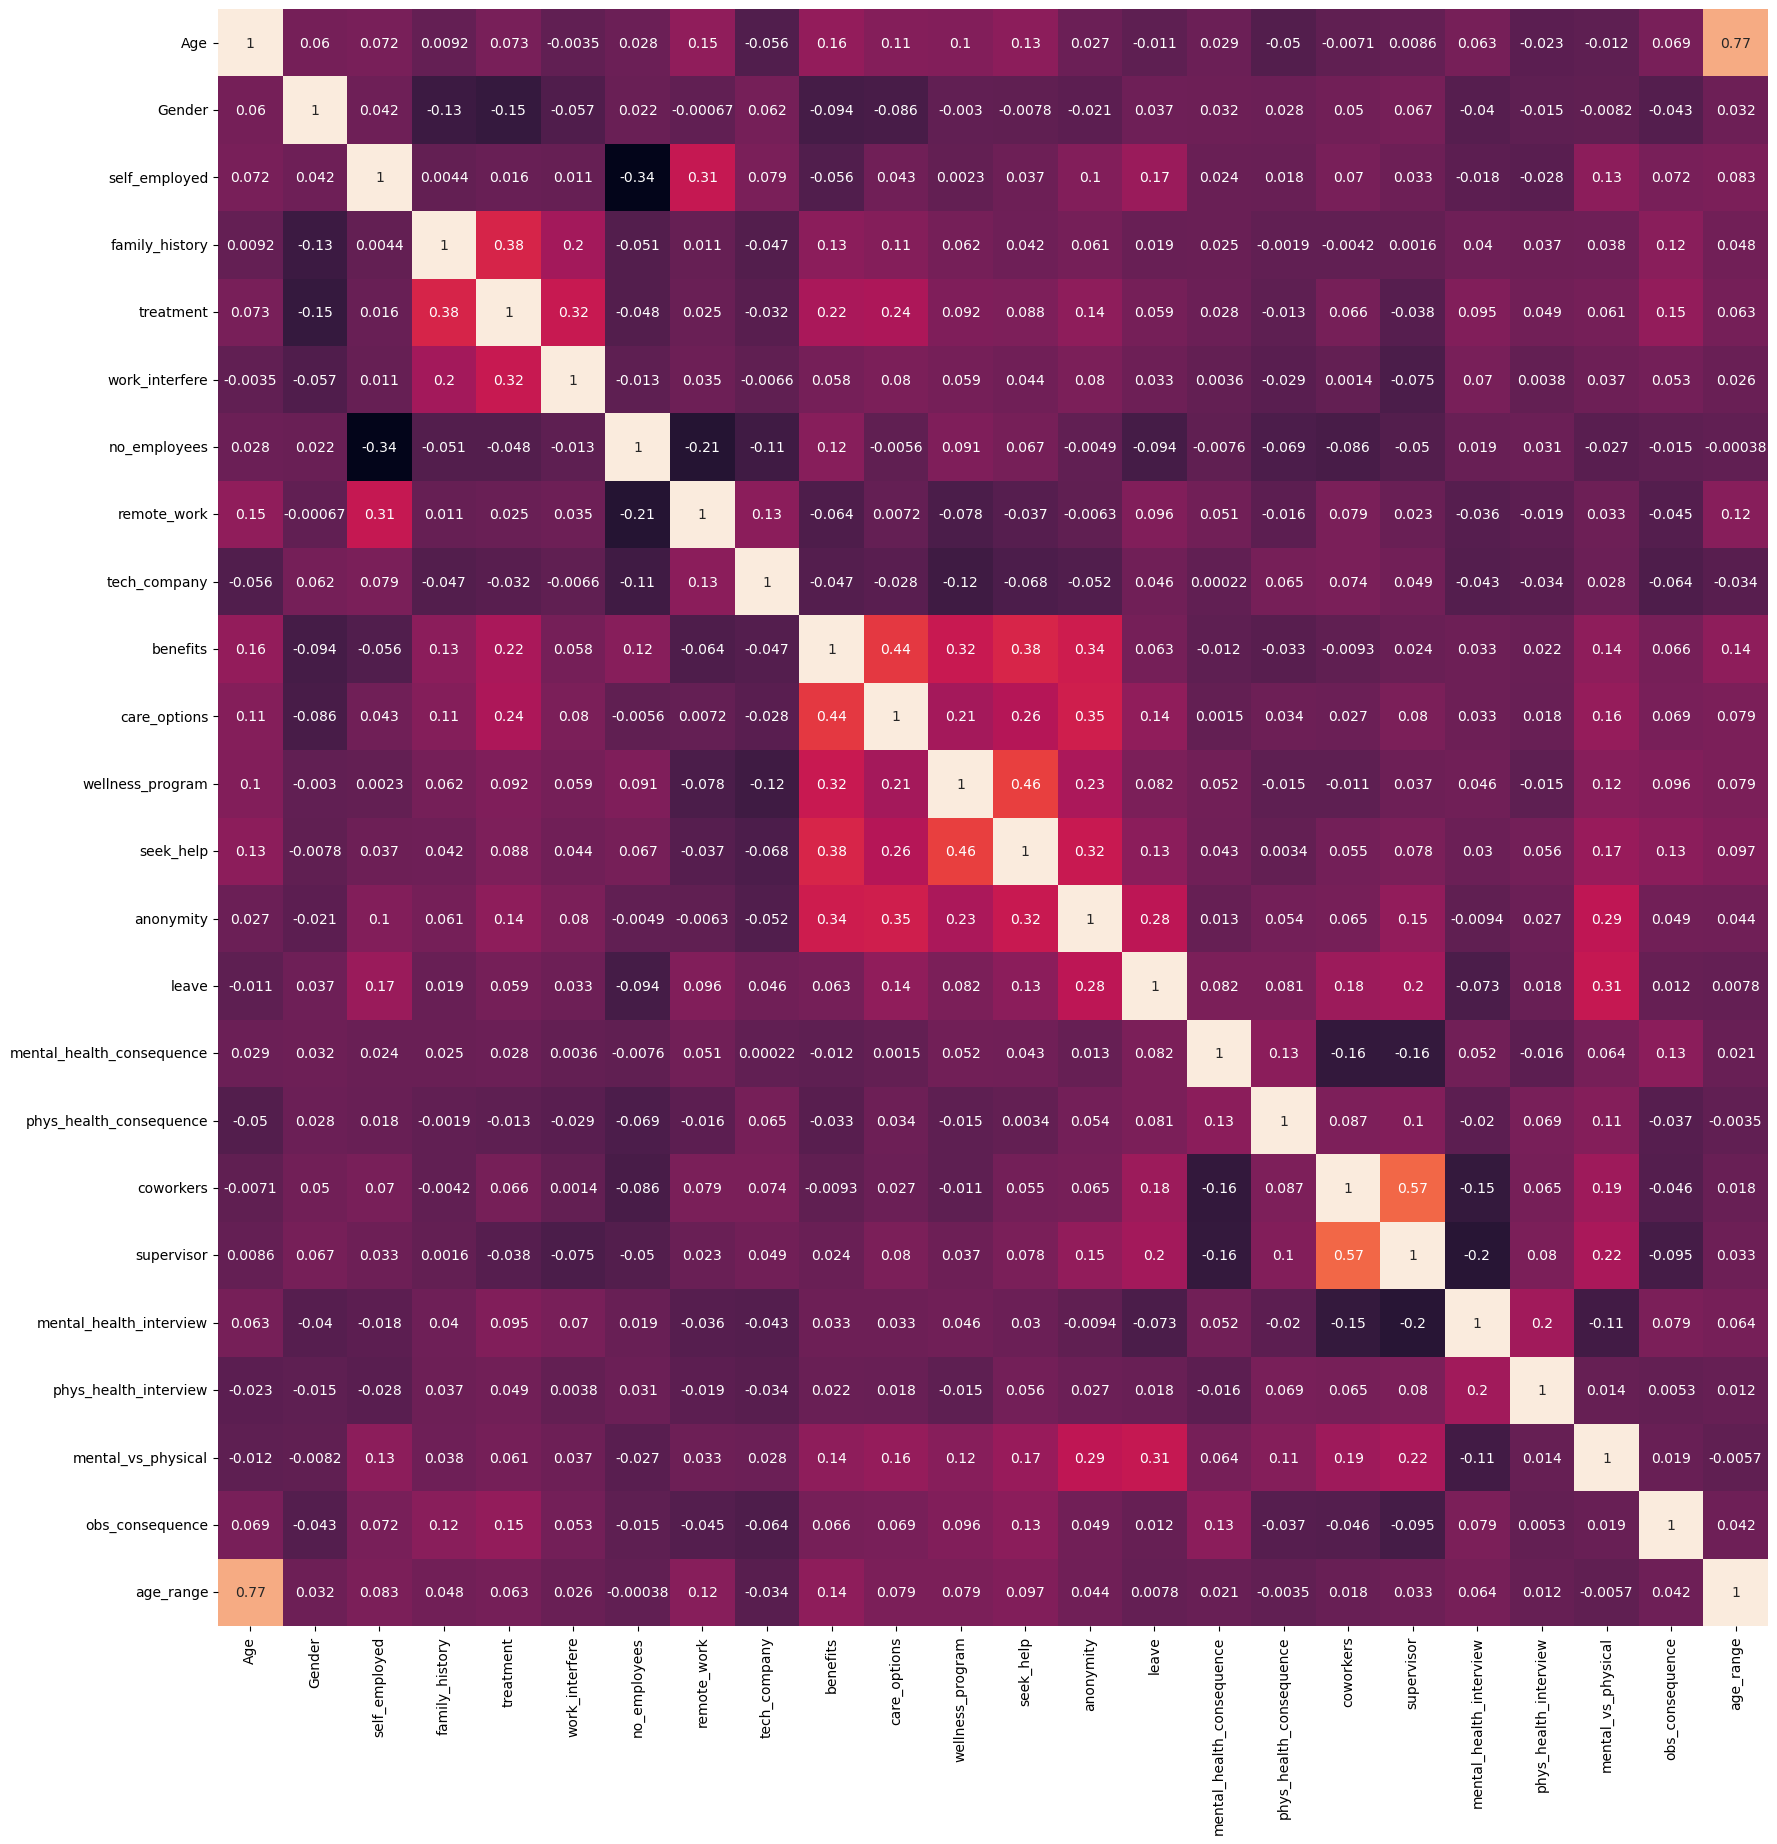

In [211]:
ig, ax = plt.subplots(figsize = (20,21))
ax = sns.heatmap(corr_matrix,
                annot = True,
                cbar = False)

In [212]:
#For outliers detection

upper_limit = mentalhealth_df["Age"].mean() + 3 * mentalhealth_df["Age"].std()
lower_limit = mentalhealth_df["Age"].mean() - 3 * mentalhealth_df["Age"].std()

print("upper limit: ", upper_limit)
print("lower limit: ", lower_limit)

# Filter the DataFrame to remove outliers
filtered_df = mentalhealth_df.loc[(mentalhealth_df["Age"] < upper_limit) & (mentalhealth_df["Age"] > lower_limit)]

# Print lengths
print("before removing outliers of Age:", len(mentalhealth_df))
print("after removing outliers of Age:", len(filtered_df))
print("number of outliers removed:", len(mentalhealth_df) - len(filtered_df))


upper limit:  35.511681746324534
lower limit:  -7.4273539818058385
before removing outliers of Age: 1257
after removing outliers of Age: 1240
number of outliers removed: 17


In [213]:
upper_limit = mentalhealth_df["Gender"].mean() + 3 * mentalhealth_df["Gender"].std()
lower_limit = mentalhealth_df["Gender"].mean() - 3 * mentalhealth_df["Gender"].std()

print("upper limit: ", upper_limit)
print("lower limit: ", lower_limit)

# Filter the DataFrame to remove outliers
filtered_df = mentalhealth_df.loc[(mentalhealth_df["Gender"] < upper_limit) & (mentalhealth_df["Gender"] > lower_limit)]

# Print lengths
print("before removing outliers of Gender:", len(mentalhealth_df))
print("after removing outliers of Gender:", len(filtered_df))
print("number of outliers Gender:", len(mentalhealth_df) - len(filtered_df))

upper limit:  2.0873604052797186
lower limit:  -0.45012890169976605
before removing outliers of Gender: 1257
after removing outliers of Gender: 1257
number of outliers Gender: 0


<Axes: >

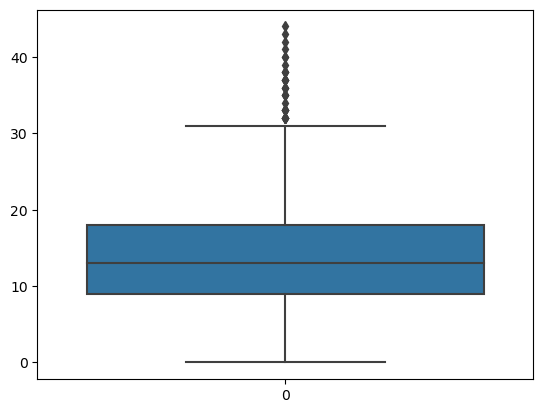

In [214]:
sns.boxplot(filtered_df['Age'],)

In [215]:
upper_limit = mentalhealth_df["self_employed"].mean() + 3 * mentalhealth_df["self_employed"].std()
lower_limit = mentalhealth_df["self_employed"].mean() - 3 * mentalhealth_df["self_employed"].std()

print("upper limit: ", upper_limit)
print("lower limit: ", lower_limit)

# Filter the DataFrame to remove outliers
filtered_df = mentalhealth_df.loc[(mentalhealth_df["self_employed"] < upper_limit) & (mentalhealth_df["self_employed"] > lower_limit)]

# Print lengths
print("before removing outliers of self_employed:", len(mentalhealth_df))
print("after removing outliers of self_employed:", len(filtered_df))
print("number of outliers removed:", len(mentalhealth_df) - len(filtered_df))

upper limit:  1.0704038063842989
lower limit:  -0.8412868612769003
before removing outliers of self_employed: 1257
after removing outliers of self_employed: 1257
number of outliers removed: 0


In [216]:
upper_limit = mentalhealth_df["leave"].mean() + 3 * mentalhealth_df["leave"].std()
lower_limit = mentalhealth_df["leave"].mean() - 3 * mentalhealth_df["leave"].std()

print("upper limit: ", upper_limit)
print("lower limit: ", lower_limit)

# Filter the DataFrame to remove outliers
filtered_df = mentalhealth_df.loc[(mentalhealth_df["leave"] < upper_limit) & (mentalhealth_df["leave"] > lower_limit)]

# Print lengths
print("before removing outliers of leave:", len(mentalhealth_df))
print("after removing outliers of leave:", len(filtered_df))
print("number of outliers removed:", len(mentalhealth_df) - len(filtered_df))

upper limit:  5.925009786482726
lower limit:  -3.1119628493307774
before removing outliers of leave: 1257
after removing outliers of leave: 1257
number of outliers removed: 0


<Axes: >

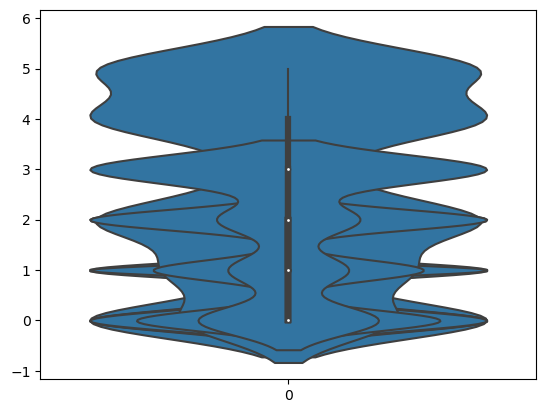

In [247]:
sns.violinplot(mentalhealth_df['leave'])
sns.violinplot(mentalhealth_df['anonymity'])
sns.violinplot(mentalhealth_df['benefits'])
sns.violinplot(mentalhealth_df['care_options'])
sns.violinplot(mentalhealth_df['coworkers'])
sns.violinplot(mentalhealth_df['mental_health_interview'])
sns.violinplot(mentalhealth_df['mental_vs_physical'])
sns.violinplot(mentalhealth_df['no_employees'])
sns.violinplot(mentalhealth_df['supervisor'])
sns.violinplot(mentalhealth_df['work_interfere'])


### As there are no outliers in some of the features of this data, but 'Age' has outliers, we removed them using IQR techniques  

# Splitting the data 

In [218]:
X = mentalhealth_df.drop(columns=['treatment'])  # Features  
y = mentalhealth_df['treatment']  # Target variable  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [219]:
X_test.fillna(X_test.mean(), inplace=True)

# Training the model  (Random Forest)

In [220]:
rf_model = RandomForestClassifier(n_estimators=200, 
                                    max_depth=10,  
                                    min_samples_split=5, 
                                    class_weight="balanced", 
                                    random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Random Forest F1: {f1_score(y_test, y_pred_rf)}")
print(f"Random Forest Recall: {recall_score(y_test, y_pred_rf)}")
print(f"Random Forest recision: {precision_score(y_test, y_pred_rf)}")


Random Forest Accuracy: 0.7658730158730159
Random Forest F1: 0.7756653992395437
Random Forest Recall: 0.7727272727272727
Random Forest recision: 0.7786259541984732


In [221]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       120
           1       0.78      0.77      0.78       132

    accuracy                           0.77       252
   macro avg       0.77      0.77      0.77       252
weighted avg       0.77      0.77      0.77       252



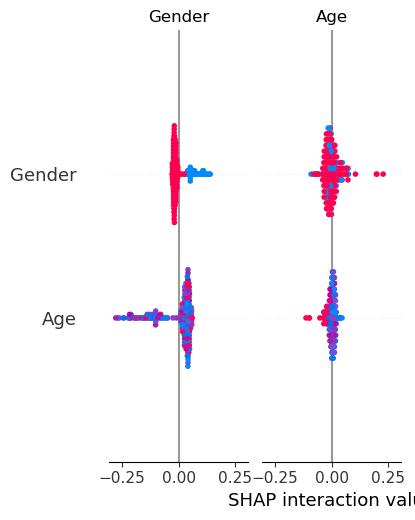

In [224]:
import shap

explainer = shap.TreeExplainer(rf_model) 
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, max_display= 5)  # Random Forest

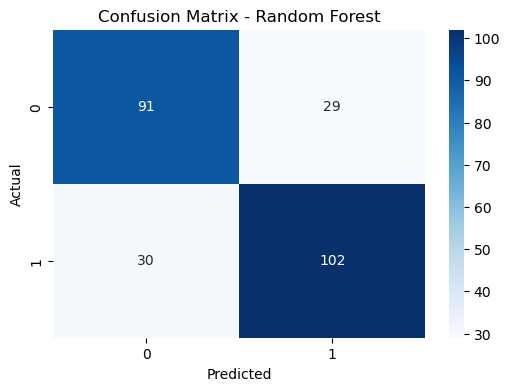

ROC-AUC Score (Random Forest): 0.7949


In [225]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Score)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Assuming 3 classes: 0, 1, 2
y_pred_proba_rf = rf_model.predict_proba(X_test)

roc_auc_rf = roc_auc_score(y_test_bin, y_pred_proba_rf, multi_class="ovr")
print(f"ROC-AUC Score (Random Forest): {roc_auc_rf:.4f}")


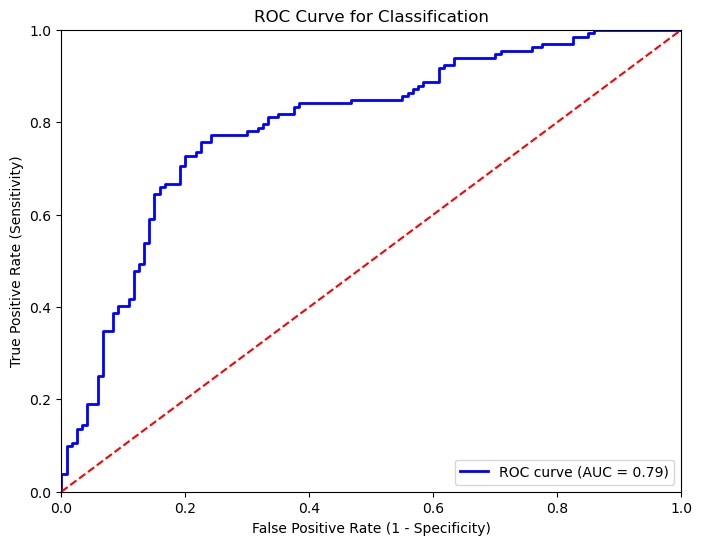

In [226]:
# Compute ROC curve for binary classification
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf[:, 1])  # Use probabilities for class 1
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Classification')
plt.legend(loc="lower right")
plt.show()


### Feature Importance 

                      Feature  Importance
4              work_interfere    0.187534
3              family_history    0.115982
0                         Age    0.090308
9                care_options    0.085884
5                no_employees    0.048717
8                    benefits    0.046570
13                      leave    0.042158
1                      Gender    0.037912
14  mental_health_consequence    0.036537
16                  coworkers    0.030211
20         mental_vs_physical    0.029141
17                 supervisor    0.027209
19      phys_health_interview    0.026381
11                  seek_help    0.023806
12                  anonymity    0.023191
22                  age_range    0.021519
10           wellness_program    0.021244
21            obs_consequence    0.020378
6                 remote_work    0.019978
18    mental_health_interview    0.018475
15    phys_health_consequence    0.017960
2               self_employed    0.014941
7                tech_company    0

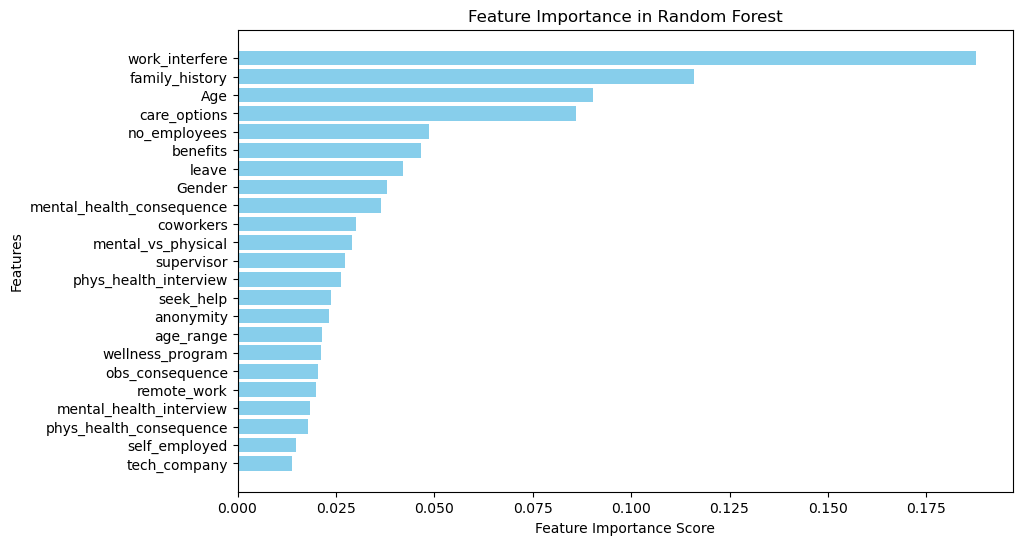

In [227]:
import pandas as pd
import numpy as np

# Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_importance_df)

# Plot feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()  # Invert to show most important at top
plt.show()


# XGBOOST MODEL

In [228]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Check Accuracy
from sklearn.metrics import accuracy_score
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Accuracy:", f1_score(y_test, y_pred_xgb))
print("XGBoost Accuracy:", recall_score(y_test, y_pred_xgb))
print("XGBoost Accuracy:", precision_score(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7063492063492064
XGBoost Accuracy: 0.7196969696969698
XGBoost Accuracy: 0.7196969696969697
XGBoost Accuracy: 0.7196969696969697


###  SHAP IMPLEMENTATION (Xgboost)

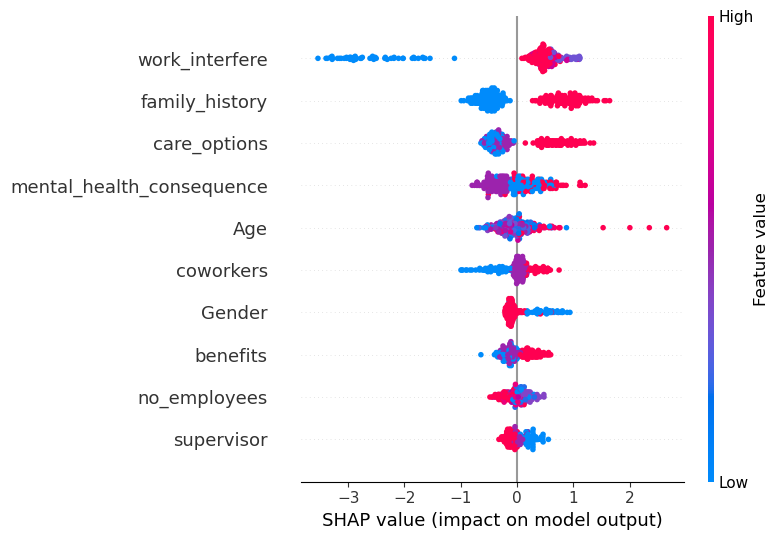

In [229]:
import shap

explainer = shap.TreeExplainer(xgb_model) 
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, max_display=10)


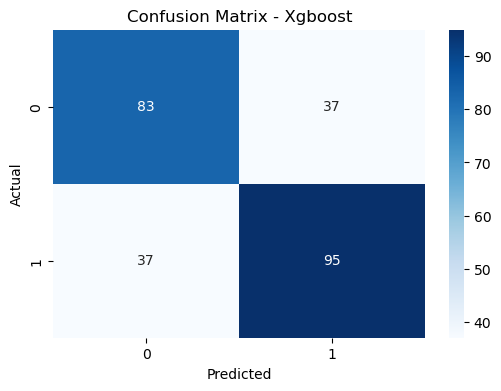

ROC-AUC Score (Xgboost): 0.7655


In [230]:
y_pred_xgb = xgb_model.predict(X_test)

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Xgboost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Score)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Assuming 3 classes: 0, 1, 2
y_pred_proba_xgb = xgb_model.predict_proba(X_test)

roc_auc_xgb = roc_auc_score(y_test_bin, y_pred_proba_xgb, multi_class="ovr")
print(f"ROC-AUC Score (Xgboost): {roc_auc_xgb:.4f}")

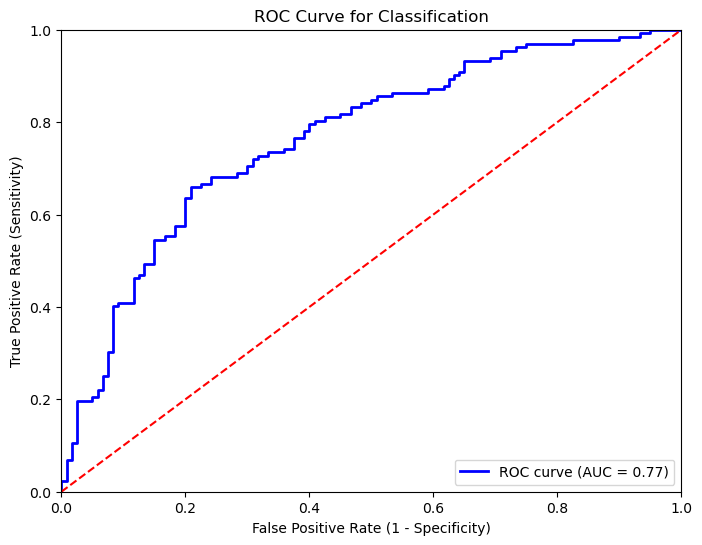

In [231]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_xgb[:, 1])  # Use probabilities for class 1
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Classification')
plt.legend(loc="lower right")
plt.show()


# Logistic Regression

In [232]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log)}")
print(f"Logistic Regression F1: {f1_score(y_test, y_pred_log)}")
print(f"Logistic Regression Recall: {recall_score(y_test, y_pred_log)}")
print(f"Logistic Regression Precision: {precision_score(y_test, y_pred_log)}")


Logistic Regression Accuracy: 0.7380952380952381
Logistic Regression F1: 0.7518796992481201
Logistic Regression Recall: 0.7575757575757576
Logistic Regression Precision: 0.746268656716418


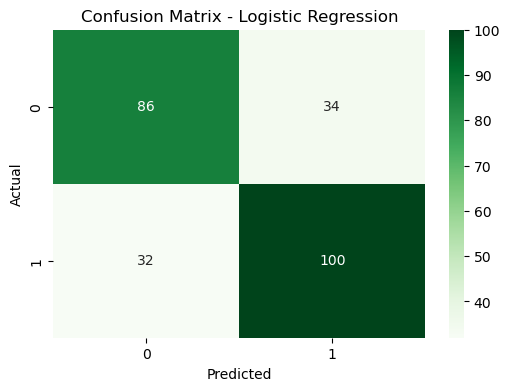

ROC-AUC Score (Logistic Regression): 0.7889


In [233]:
# Predictions
y_pred_log = log_model.predict(X_test)

# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Score
y_pred_proba_log = log_model.predict_proba(X_test)

roc_auc_log = roc_auc_score(y_test_bin, y_pred_proba_log, multi_class="ovr")
print(f"ROC-AUC Score (Logistic Regression): {roc_auc_log:.4f}")


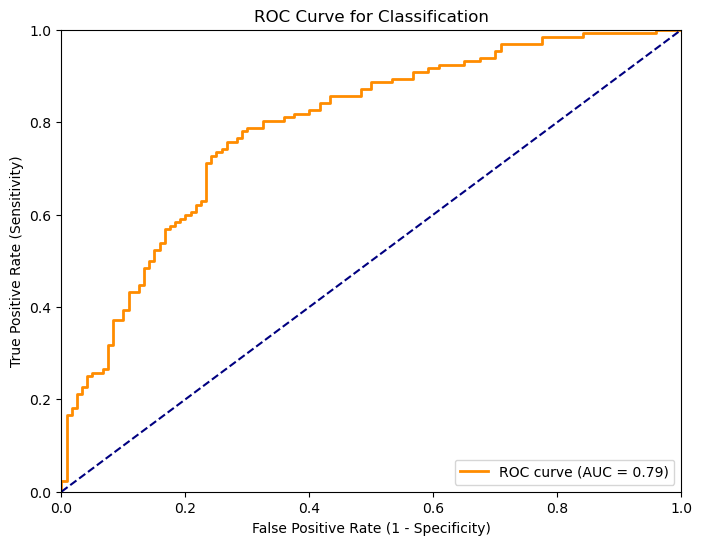

In [234]:
# Compute ROC curve for binary classification
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_log[:, 1])  # Use probabilities for class 1
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Classification')
plt.legend(loc="lower right")
plt.show()

###  SHAP IMPLEMENTATION (LR)

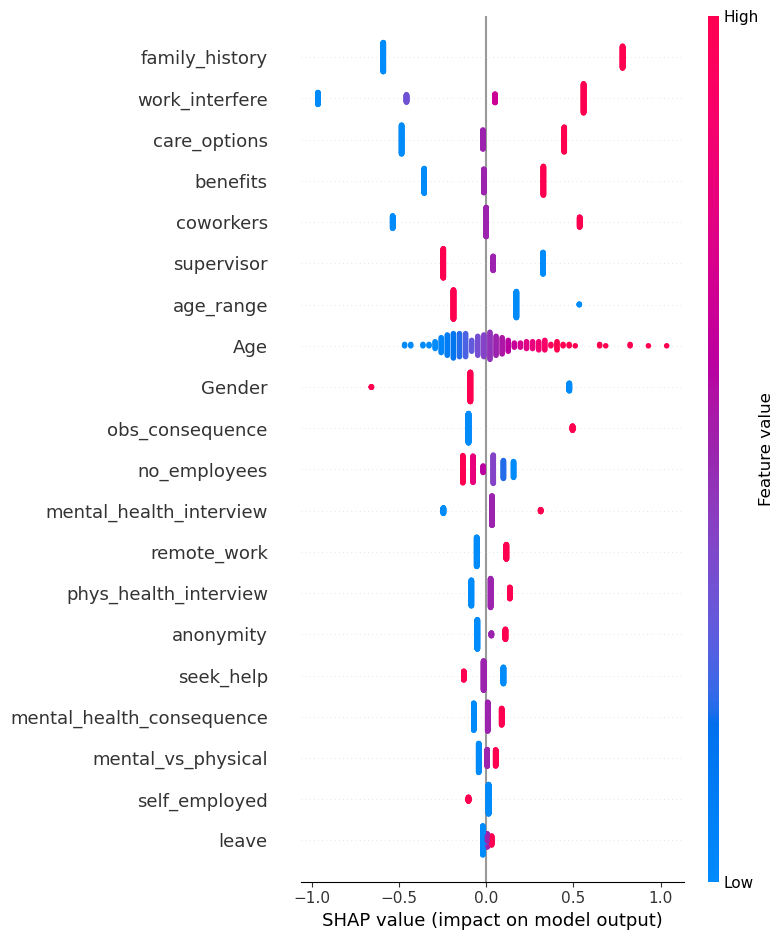

In [235]:
import shap

# Create SHAP explainer for Logistic Regression
explainer = shap.Explainer(log_model, X_test)

# Compute SHAP values
shap_values = explainer(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test, max_display=20)


# ANN 

In [236]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

# Normalize the data for better ANN performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the ANN model
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='softmax'),
    Dense(1, activation='sigmoid')  # Binary classification (0 or 1)
])

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN model
ann_model.fit(X_train_scaled, y_train, epochs= 10 , batch_size= 8, validation_data=(X_test_scaled, y_test))

# Evaluate on test data
loss, accuracy = ann_model.evaluate(X_test_scaled, y_test)
print(f"ANN Model Accuracy: {accuracy:.4f}")





Epoch 1/10
126/126 [==============================] - 1s 3ms/step - loss: 0.6785 - accuracy: 0.6109 - val_loss: 0.6481 - val_accuracy: 0.6944
Epoch 2/10
126/126 [==============================] - 0s 2ms/step - loss: 0.6248 - accuracy: 0.6955 - val_loss: 0.6082 - val_accuracy: 0.7183
Epoch 3/10
126/126 [==============================] - 0s 2ms/step - loss: 0.5906 - accuracy: 0.7433 - val_loss: 0.5926 - val_accuracy: 0.7421
Epoch 4/10
126/126 [==============================] - 0s 2ms/step - loss: 0.5759 - accuracy: 0.7473 - val_loss: 0.5873 - val_accuracy: 0.7302
Epoch 5/10
126/126 [==============================] - 0s 2ms/step - loss: 0.5692 - accuracy: 0.7493 - val_loss: 0.5854 - val_accuracy: 0.7341
Epoch 6/10
126/126 [==============================] - 0s 2ms/step - loss: 0.5498 - accuracy: 0.7711 - val_loss: 0.5778 - val_accuracy: 0.7341
Epoch 7/10
126/126 [==============================] - 0s 2ms/step - loss: 0.5403 - accuracy: 0.7751 - val_loss: 0.5803 - val_accuracy: 0.7262
Epoch 

# COPING MECHANISM (AND SEVERITY PREDICTION)

In [237]:
def assign_severity(prediction):
    if prediction == 0:
        return "Mild"
    elif prediction == 1:
        return "Moderate"
    else:
        return "Severe"


In [238]:
mentalhealth_df['severity'] = mentalhealth_df['treatment'].apply(assign_severity)


In [239]:
coping_strategies = {
    "Mild": "Practice mindfulness and maintain a balanced lifestyle.",
    "Moderate": "Consider therapy or professional guidance for structured support.",
    "Severe": "Seek immediate help from a mental health professional."
}

mentalhealth_df['coping_mechanism'] = mentalhealth_df['severity'].map(coping_strategies)


### So we take the prediction like if its "0" then its "Mild", for "1" its "Moderate" and if not any, then it returns "Severe"

### Mild: Practice mindfulness and maintain a balanced lifestyle.
### Moderate: Consider therapy or professional guidance for structured support.
### Severe: Seek immediate help from a mental health professional.

# SAVEING THE MODEL (WE SAVE THREE MODELS TO COM[ARE THE RESULTS OR PREDICTION])

In [240]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Assuming rf_model is your trained model
joblib.dump(rf_model, "mental_health_model.pkl", protocol = 4)
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [241]:
import joblib
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load the saved model
model = joblib.load("mental_health_model.pkl")

# Manually input data for checking the model's accuracy
input_data = pd.DataFrame({
    'age': [39],
    'gender': [1],  # Male = 1, Female = 0
    'family_history': [0],  # Yes = 1, No = 0
    'self_employed': [0],  # No = 0, Yes = 1
    'work_interfere': [1],  
    'no_employees': [1],  
    'remote_work': [1],  # Yes = 1, No = 0
    'tech_company': [2],  # Yes = 1, No = 0
    'benefits': [1],  # Example
    'care_options': [0],
    'wellness_program': [1],
    'seek_help': [1],
    'anonymity': [1],
    'leave': [2],
    'mental_health_consequence': [2],
    'phys_health_consequence': [0],
    'coworkers': [1],
    'supervisor': [1],
    'mental_health_interview': [0],
    'phys_health_interview': [0],
    'mental_vs_physical': [0],
    'obs_consequence': [0],
    'obs_frequency': [1],
})

input_data = input_data.values  # Now it's a 2D NumPy array

# Check the shape (should be (1, n_features) for a single prediction)
print("Input Data Shape:", input_data.shape)

# Make prediction
prediction = model.predict(input_data)

# Function to assign severity level based on prediction
def assign_severity(prediction):
    if prediction == 0:
        return "Mild"
    elif prediction == 1:
        return "Moderate"
    else:
        return "Severe"

# Coping strategies dictionary based on severity level
coping_strategies = {
    "Mild": "Practice mindfulness and maintain a balanced lifestyle.",
    "Moderate": "Consider therapy or professional guidance for structured support.",
    "Severe": "Seek immediate help from a mental health professional."
}

# Assign severity and coping mechanism
severity = assign_severity(prediction[0])
coping_mechanism = coping_strategies[severity]

# Output the results
print(f"Predicted Mental Health Condition: {prediction[0]}")
print(f"Severity Level: {severity}")
print(f"Suggested Coping Mechanism: {coping_mechanism}")


Input Data Shape: (1, 23)
Predicted Mental Health Condition: 1
Severity Level: Moderate
Suggested Coping Mechanism: Consider therapy or professional guidance for structured support.


In [242]:
import joblib
import joblib
joblib.dump(log_model, "mental_health_model(LR).pkl")

['mental_health_model(LR).pkl']

In [243]:
import joblib
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load the saved model
model = joblib.load("mental_health_model(LR).pkl")

# Manually input data for checking the model's accuracy
input_data = pd.DataFrame({
    'age': [18],
    'gender': [1],  # Male = 1, Female = 0
    'family_history': [0],  # Yes = 1, No = 0
    'self_employed': [0],  # No = 0, Yes = 1
    'work_interfere': [1],  
    'no_employees': [1],  
    'remote_work': [0],  # Yes = 1, No = 0
    'tech_company': [2],  # Yes = 1, No = 0
    'benefits': [1],  # Example
    'care_options': [0],
    'wellness_program': [1],
    'seek_help': [1],
    'anonymity': [1],
    'leave': [2],
    'mental_health_consequence': [2],
    'phys_health_consequence': [0],
    'coworkers': [1],
    'supervisor': [1],
    'mental_health_interview': [0],
    'phys_health_interview': [0],
    'mental_vs_physical': [0],
    'obs_consequence': [1],
    'obs_frequency': [1],
})

input_data = input_data.values  # Now it's a 2D NumPy array

# Check the shape (should be (1, n_features) for a single prediction)
print("Input Data Shape:", input_data.shape)

# Make prediction
prediction = model.predict(input_data)

# Function to assign severity level based on prediction
def assign_severity(prediction):
    if prediction == 0:
        return "Mild"
    elif prediction == 1:
        return "Moderate"
    else:
        return "Severe"

# Coping strategies dictionary based on severity level
coping_strategies = {
    "Mild": "Practice mindfulness and maintain a balanced lifestyle.",
    "Moderate": "Consider therapy or professional guidance for structured support.",
    "Severe": "Seek immediate help from a mental health professional."
}

# Assign severity and coping mechanism
severity = assign_severity(prediction[0])
coping_mechanism = coping_strategies[severity]

# Output the results
print(f"Predicted Mental Health Condition: {prediction[0]}")
print(f"Severity Level: {severity}")
print(f"Suggested Coping Mechanism: {coping_mechanism}")


Input Data Shape: (1, 23)
Predicted Mental Health Condition: 0
Severity Level: Mild
Suggested Coping Mechanism: Practice mindfulness and maintain a balanced lifestyle.


In [244]:
import joblib
import joblib
joblib.dump(xgb_model, "mental_health_model(XGBOOST).pkl")

['mental_health_model(XGBOOST).pkl']

In [245]:
import joblib
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load the saved model
model = joblib.load("mental_health_model(XGBOOST).pkl")

# Manually input data for checking the model's accuracy
input_data = pd.DataFrame({
    'age': [18],
    'gender': [1],  # Male = 1, Female = 0
    'family_history': [0],  # Yes = 1, No = 0
    'self_employed': [0],  # No = 0, Yes = 1
    'work_interfere': [1],  
    'no_employees': [1],  
    'remote_work': [0],  # Yes = 1, No = 0
    'tech_company': [2],  # Yes = 1, No = 0
    'benefits': [1],  # Example
    'care_options': [0],
    'wellness_program': [1],
    'seek_help': [1],
    'anonymity': [1],
    'leave': [2],
    'mental_health_consequence': [2],
    'phys_health_consequence': [0],
    'coworkers': [1],
    'supervisor': [1],
    'mental_health_interview': [0],
    'phys_health_interview': [0],
    'mental_vs_physical': [0],
    'obs_consequence': [1],
    'obs_frequency': [1],
})

input_data = input_data.values  # Now it's a 2D NumPy array

# Check the shape (should be (1, n_features) for a single prediction)
print("Input Data Shape:", input_data.shape)

# Make prediction
prediction = model.predict(input_data)

# Function to assign severity level based on prediction
def assign_severity(prediction):
    if prediction == 0:
        return "Mild"
    elif prediction == 1:
        return "Moderate"
    else:
        return "Severe"

# Coping strategies dictionary based on severity level
coping_strategies = {
    "Mild": "Practice mindfulness and maintain a balanced lifestyle.",
    "Moderate": "Consider therapy or professional guidance for structured support.",
    "Severe": "Seek immediate help from a mental health professional."
}

# Assign severity and coping mechanism
severity = assign_severity(prediction[0])
coping_mechanism = coping_strategies[severity]

# Output the results
print(f"Predicted Mental Health Condition: {prediction[0]}")
print(f"Severity Level: {severity}")
print(f"Suggested Coping Mechanism: {coping_mechanism}")


Input Data Shape: (1, 23)
Predicted Mental Health Condition: 0
Severity Level: Mild
Suggested Coping Mechanism: Practice mindfulness and maintain a balanced lifestyle.
